_13. Using the Boston data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, and KNN models using various subsets of the predictors. Describe your findings._

In [3]:
.libPaths("/Library/Frameworks/R.framework/Versions/3.4/Resources/library")
.libPaths() #Added R Studio's Package Path to Anaconda's Path
library(ISLR)
library(MASS)

[1] "/Library/Frameworks/R.framework/Versions/3.4/Resources/library"
[2] "/Users/Ajay/anaconda/lib/R/library"

In [4]:
head(Boston)

crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


Let us create a response variable _high_crime_ which is 1 when the crime rate _crim_ is above the median and 0 when below.

In [4]:
df = data.frame(matrix(0, ncol=1, nrow=nrow(Boston)))
colnames(df) = "high_crim"
new_Boston = cbind(df, Boston)
new_Boston$high_crim[new_Boston$crim > median(new_Boston$crim)] = 1
head(new_Boston, 20)

high_crim,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
0,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
0,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
0,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
0,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
0,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


I first created a new _data.frame_ initialized with the shape $ num \space samples \times 1 $ using the `matrix()` function. Each entry was initialized to 0. The column name of the data.frame `df` was changed to _high crim_. We then perform a column bind to prepend the existing _Boston_ data frame with the new column entry. The value of _high crim_ is then modified based on the values in _crim_. 

We now have to perform the following steps:
- Variable Selection : Determine which covariates effect the response variable
- Split Data: Generate Training and Testing Data.
- Model Selection: We will use Logistic Regression, LDA, QDA and KNN. 

## Variable Selection

Lets us take a look at the data from it's summary

In [87]:
summary(new_Boston)

   high_crim        crim                zn             indus      
 Min.   :0.0   Min.   : 0.00632   Min.   :  0.00   Min.   : 0.46  
 1st Qu.:0.0   1st Qu.: 0.08204   1st Qu.:  0.00   1st Qu.: 5.19  
 Median :0.5   Median : 0.25651   Median :  0.00   Median : 9.69  
 Mean   :0.5   Mean   : 3.61352   Mean   : 11.36   Mean   :11.14  
 3rd Qu.:1.0   3rd Qu.: 3.67708   3rd Qu.: 12.50   3rd Qu.:18.10  
 Max.   :1.0   Max.   :88.97620   Max.   :100.00   Max.   :27.74  
      chas              nox               rm             age        
 Min.   :0.00000   Min.   :0.3850   Min.   :3.561   Min.   :  2.90  
 1st Qu.:0.00000   1st Qu.:0.4490   1st Qu.:5.886   1st Qu.: 45.02  
 Median :0.00000   Median :0.5380   Median :6.208   Median : 77.50  
 Mean   :0.06917   Mean   :0.5547   Mean   :6.285   Mean   : 68.57  
 3rd Qu.:0.00000   3rd Qu.:0.6240   3rd Qu.:6.623   3rd Qu.: 94.08  
 Max.   :1.00000   Max.   :0.8710   Max.   :8.780   Max.   :100.00  
      dis              rad              tax     

From the get go, I noticed some high leverage samples because of the _crim_ summary. $75\% $ of the samples have a values less than $3.6$. Yet the maximum goes up to **88.97**! We see a similar effect in _zn_. In the case of _age_, there is a significant difference between the minimum and the 1st quantile mark.

Let us determine the dependence of this new class _high crim_ with the other features

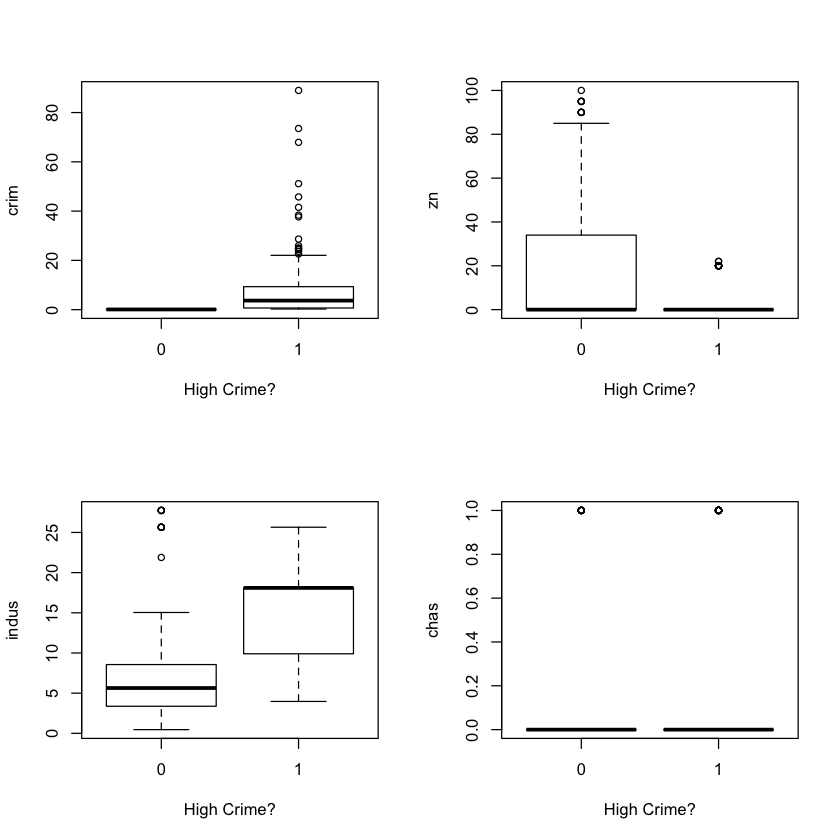

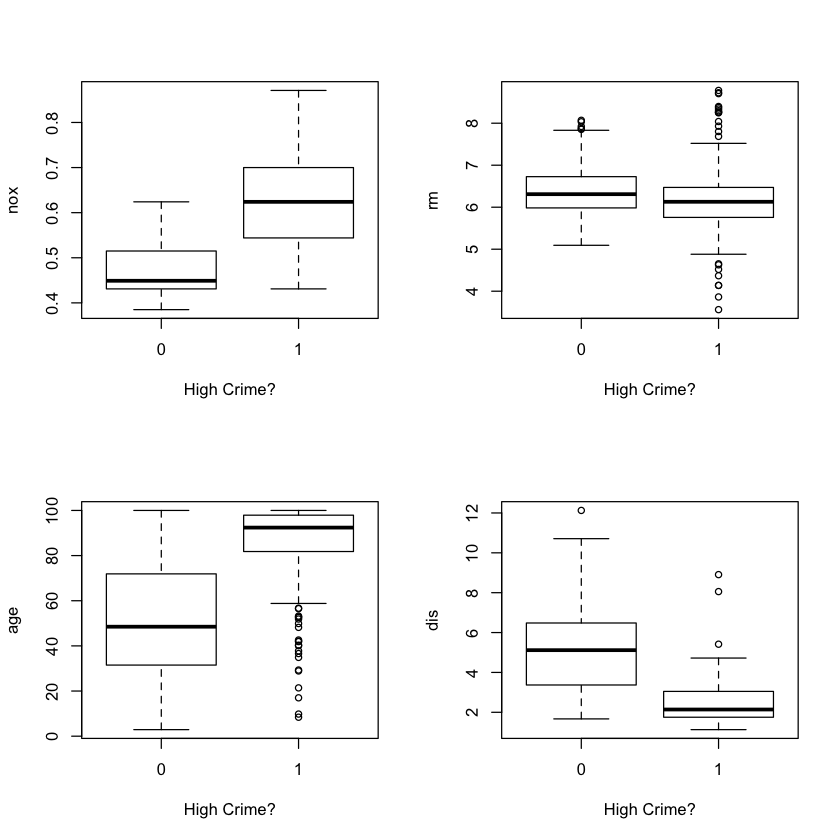

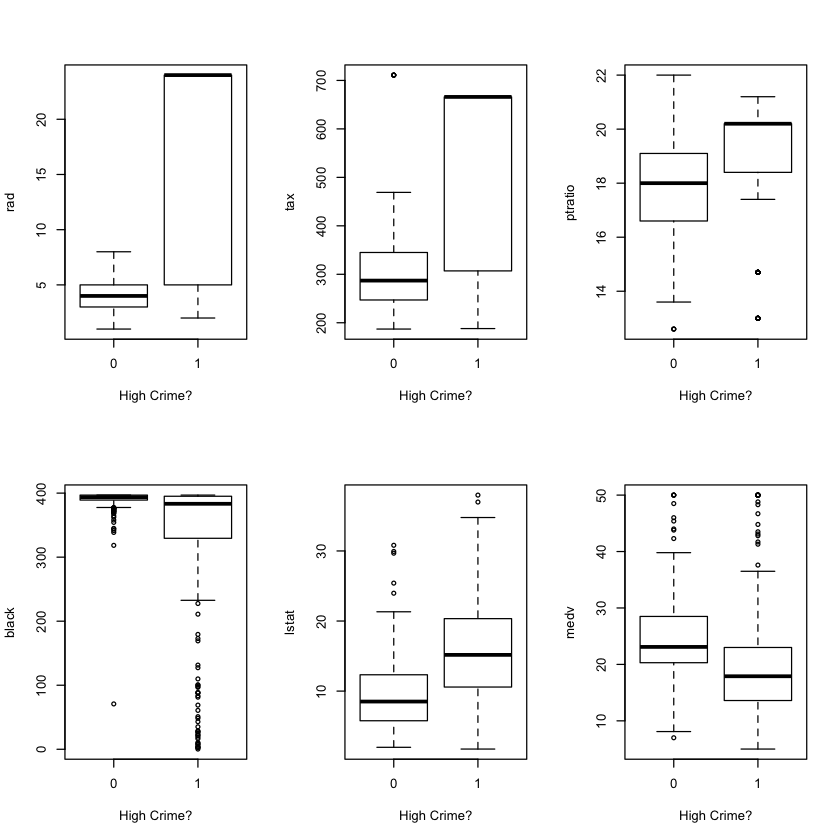

In [97]:
par(mfrow=c(2,2))
boxplot(crim~high_crim, data=new_Boston, xlab="High Crime?", ylab="crim")
boxplot(zn~high_crim, data=new_Boston, xlab="High Crime?", ylab="zn")
boxplot(indus~high_crim, data=new_Boston, xlab="High Crime?", ylab="indus")
boxplot(chas~high_crim, data=new_Boston, xlab="High Crime?", ylab="chas")
boxplot(nox~high_crim, data=new_Boston, xlab="High Crime?", ylab="nox")
boxplot(rm~high_crim, data=new_Boston, xlab="High Crime?", ylab="rm")
boxplot(age~high_crim, data=new_Boston, xlab="High Crime?", ylab="age")
boxplot(dis~high_crim, data=new_Boston, xlab="High Crime?", ylab="dis")

par(mfrow=c(2,3))
boxplot(rad~high_crim, data=new_Boston, xlab="High Crime?", ylab="rad")
boxplot(tax~high_crim, data=new_Boston, xlab="High Crime?", ylab="tax")
boxplot(ptratio~high_crim, data=new_Boston, xlab="High Crime?", ylab="ptratio")
boxplot(black~high_crim, data=new_Boston, xlab="High Crime?", ylab="black")
boxplot(lstat~high_crim, data=new_Boston, xlab="High Crime?", ylab="lstat")
boxplot(medv~high_crim, data=new_Boston, xlab="High Crime?", ylab="medv")

We'll only consider predictors where we see some significant separation. In our case, we exclude _rm_, _chas_. 

## Split our Data

Let us now split the data into train and test sets. We first shuffle the data using the sample function. Since the `sample` function wants a vector of numbers, we shuffle numbers from 1 to the number of tuples. We then access the wor numbers of these tuples.

In [5]:
set.seed(1)
shuffled_idx = sample(nrow(new_Boston), nrow(new_Boston))

train_idx = shuffled_idx[1:(0.7*length(shuffled_idx))]
test_idx = shuffled_idx[(0.7*length(shuffled_idx)+1):length(shuffled_idx)]

train = new_Boston[train_idx,-c(5, 7)]
test = new_Boston[test_idx,-c(5, 7)]

dim(train)
dim(test)

[1] 354  13

[1] 151  13

## Training our Model

### Logistic Regression

In [141]:
model = glm(high_crim~. -crim -high_crim, train, family="binomial")
predictions = predict(model, test[,-1] ,type="response") # It should be test[,-c(1,2)]. Why it's working with _crim_?
preds = data.frame(matrix(0, nrow=length(predictions), ncol=1))
colnames(preds) = "preds"

new_frame = data.frame(cbind(predictions, preds))
new_frame$preds[new_frame$predictions > 0.5] = 1

predicted_labels = test[,1]
actual_labels = new_frame[,2]

confusion = table(predicted_labels, actual_labels)[2:1, 2:1]
confusion

                actual_labels
predicted_labels  1  0
               1 69  7
               0  4 71

Let us use our performance function written for question 10.

In [142]:
f_beta_measure = function(precision, recall, beta){
    return ( 1/((beta*(1/precision))+ ((1-beta)*(1/recall))))
}

get_accuracy_scores = function(conf){
    TP = conf[1,1]
    FP = conf[1,2]
    FN = conf[2,1]
    TN = conf[2,2]
    
    simple_accuracy = (TP+TN)/(TP+FP+TN+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    f = f_beta_measure(precision, recall, beta=0.5)
    return (c(simple_accuracy, precision, recall, f))
}

get_accuracy_scores(confusion)

[1] 0.9271523 0.9078947 0.9452055 0.9261745

We have some pretty good accuracy scores. Simple Accuracy here is $92.71\%$, giving us a test error of $7.19\%$

### Linear Discriminant Analysis

We now train an LDA model without _crim_ rate. 

In [164]:
model = lda(high_crim~. -crim -high_crim, train)
preds = predict(model, test[,-1])

predicted_labels = preds$class
actual_labels = test[,1]

confusion = table(predicted_labels, actual_labels)[2:1, 2:1]
confusion

                actual_labels
predicted_labels  1  0
               1 57  1
               0 19 74

In [165]:
get_accuracy_scores(confusion)

[1] 0.8675497 0.9827586 0.7500000 0.8507463

So we get an accuracy of $86.75\%$, or a training error of $13.25\%$

But let us now exclude every other column, and use _crim_ as the only covariate.

In [195]:
model = lda(high_crim~crim, train)
preds = predict(model, test[,1:2]) 

predicted_labels = preds$class
actual_labels = test[,1]

confusion = table(predicted_labels, actual_labels)[2:1, 2:1]
confusion

                actual_labels
predicted_labels  1  0
               1 35  0
               0 41 75

**NOTE**: It looks like the accuracy actually fell even though we only consider _crim_. It is surprising because _high crim_ was created from _crim_. I expected a $ 0\% $ error rate. There doesn't seem to be unbalanced training data.

In [198]:
dim(train[train$high_crim < median(new_Boston$high_crim),])
dim(train[train$high_crim >= median(new_Boston$high_crim),])

[1] 177  13

[1] 177  13

### Quadratic Discriminant Analysis

We now train a QDA model without crime rate.

In [200]:
model = qda(high_crim~. -crim -high_crim, train)
preds = predict(model, test[,-1])

predicted_labels = preds$class
actual_labels = test[,1]

confusion = table(predicted_labels, actual_labels)[2:1, 2:1]
confusion

                actual_labels
predicted_labels  1  0
               1 54  1
               0 22 74

But what if crim is the only covariate?

In [201]:
model = qda(high_crim~crim, train)
preds = predict(model, test[,1:2]) 

predicted_labels = preds$class
actual_labels = test[,1]

confusion = table(predicted_labels, actual_labels)[2:1, 2:1]
confusion

                actual_labels
predicted_labels  1  0
               1 71  0
               0  5 75

In [202]:
get_accuracy_scores(confusion)

[1] 0.9668874 1.0000000 0.9342105 0.9659864

This works as intended. We have a very high performance in _high crim_  as this was created from _crim_. From the results, we have $0$ false positives, giving us $100 \%$ Precision.

## KNN

In [6]:
library(class)

In [13]:
X_train = train[,-1]
y_train = train[,1] 

X_test = test[,-1]
y_test = test[,1]

tab = data.frame(matrix(ncol=4, nrow=0))

for (k in 1:100){
    preds = knn(X_train, X_test, y_train, k=k)
    conf = table(preds, y_test)[2:1, 2:1]
    scores = get_accuracy_scores(conf)
    tab = rbind(tab, scores)
}

colnames(tab) = c("Accuracy","Precision", "Recall", "F")
rownames(tab) = paste("", 1:nrow(tab)) # A little work around to visually display row numbers

head(tab)

,Accuracy,Precision,Recall,F
1,0.9205298,0.9444444,0.8947368,0.9189189
2,0.9006623,0.9178082,0.8815789,0.8993289
3,0.9271523,0.9710145,0.8815789,0.9241379
4,0.9205298,0.9571429,0.8815789,0.9178082
5,0.9139073,0.9436620,0.8815789,0.9115646
6,0.9072848,0.9305556,0.8815789,0.9054054


Warning message in plot.xy(xy, type, ...):
“plot type 'line' will be truncated to first character”

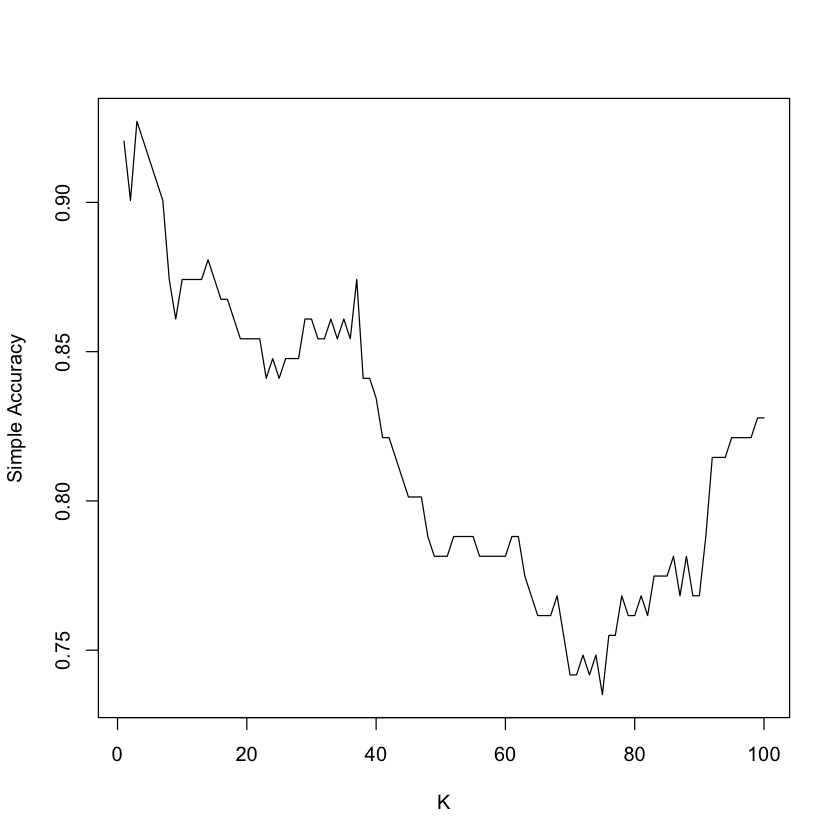

In [20]:
x = 1:100
y = tab$Accuracy

plot(x=x, y=y, xlab="K", ylab="Simple Accuracy", type="line")

It is interesting to note the highest simaple accuracy is at _k_ = 3. 

In [21]:
tab[tab$Accuracy == max(tab$Accuracy),]

,Accuracy,Precision,Recall,F
3,0.9271523,0.9710145,0.8815789,0.9241379


Let us take _crim_ rate as the only covariate.

In [35]:
X_train = as.data.frame(train[,2])
y_train = train[,1]

X_test = as.data.frame(test[,2])
y_test = as.factor(test[,1])

tab = data.frame(matrix(ncol=4, nrow=0))

for (k in 1:100){
    preds = knn(X_train, X_test, y_train, k=k)
    conf = table(preds, y_test)[2:1, 2:1]
    scores = get_accuracy_scores(conf)
    tab = rbind(tab, scores)
}

colnames(tab) = c("Accuracy","Precision", "Recall", "F")
rownames(tab) = paste("", 1:nrow(tab)) # A little work around to visually display row numbers

head(tab)

,Accuracy,Precision,Recall,F
1,1.0000000,1,1.0000000,1.0000000
2,1.0000000,1,1.0000000,1.0000000
3,1.0000000,1,1.0000000,1.0000000
4,0.9933775,1,0.9868421,0.9933775
5,0.9933775,1,0.9868421,0.9933775
6,0.9933775,1,0.9868421,0.9933775


We actually get a perfect predictions for all types of performance measures when $ \textit{K = 1,2, and 3}$!